# part 1

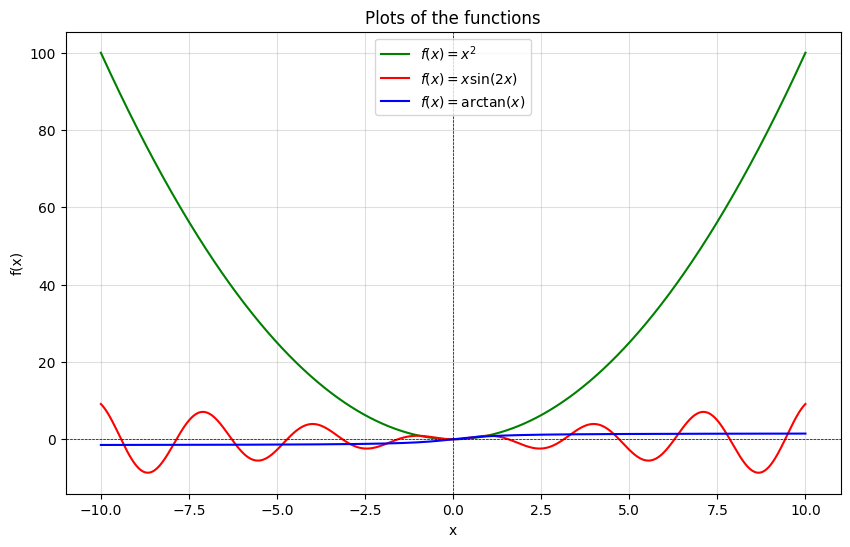

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x = np.linspace(-10, 10, 1000)

# Define the functions
f1 = x**2
f2 = x * np.sin(2 * x)
f3 = np.arctan(x)

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r"$f(x) = x^2$", color="green")
plt.plot(x, f2, label=r"$f(x) = x \sin(2x)$", color="red")
plt.plot(x, f3, label=r"$f(x) = \arctan(x)$", color="blue")

# Add labels, legend, and grid
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plots of the functions")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


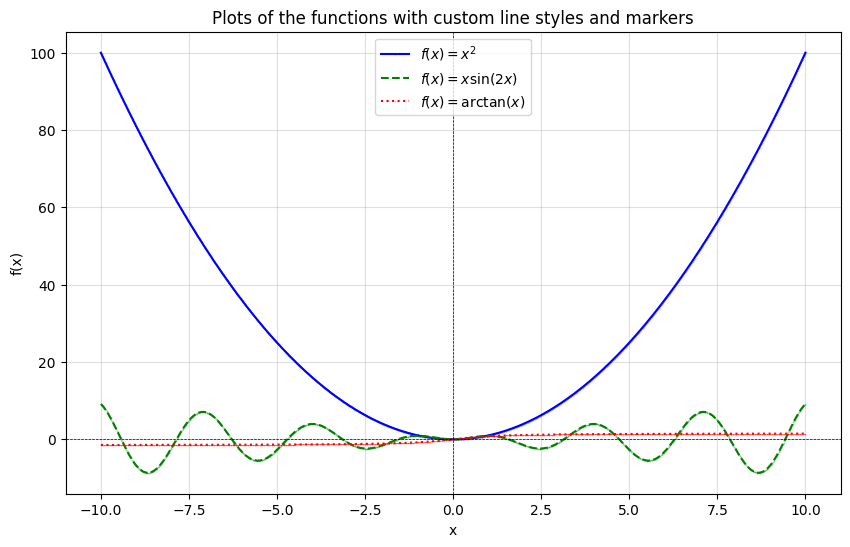

In [2]:
# Plot the functions with updated styles and markers
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r"$f(x) = x^2$", color="blue", linestyle="-", marker="o", markersize=0.1)
plt.plot(x, f2, label=r"$f(x) = x \sin(2x)$", color="green", linestyle="--", marker="s", markersize=0.1)
plt.plot(x, f3, label=r"$f(x) = \arctan(x)$", color="red", linestyle=":", marker="^", markersize=0.1)

# Add labels, legend, and grid
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plots of the functions with custom line styles and markers")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()


In [3]:
import pandas as pd

points_file = "points.csv"
distances_file = "distances.csv"
points = pd.read_csv(points_file).to_numpy()
distances = pd.read_csv(distances_file).to_numpy()

points.shape, distances.shape

((99, 2), (99, 1))

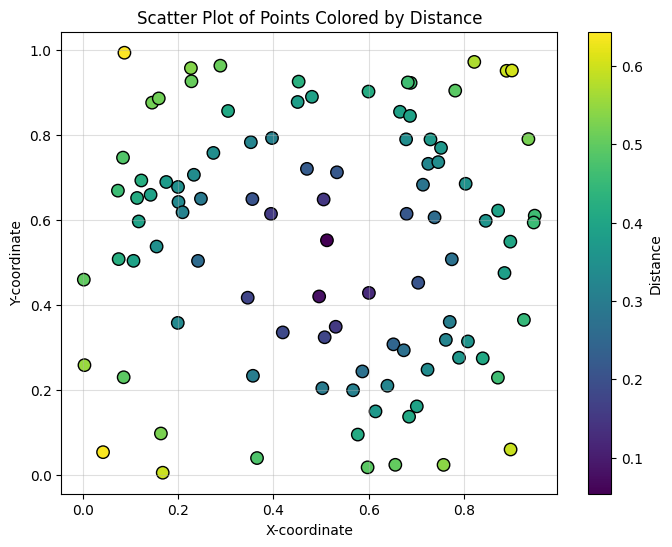

In [ ]:
x = points[:, 0]
y = points[:, 1]

distances = distances.flatten()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=distances, cmap="viridis", edgecolor="k", s=80)
plt.colorbar(scatter, label="Distance")

plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("Scatter Plot of Points Colored by Distance")
plt.grid(alpha=0.4)
plt.show()


# part 2

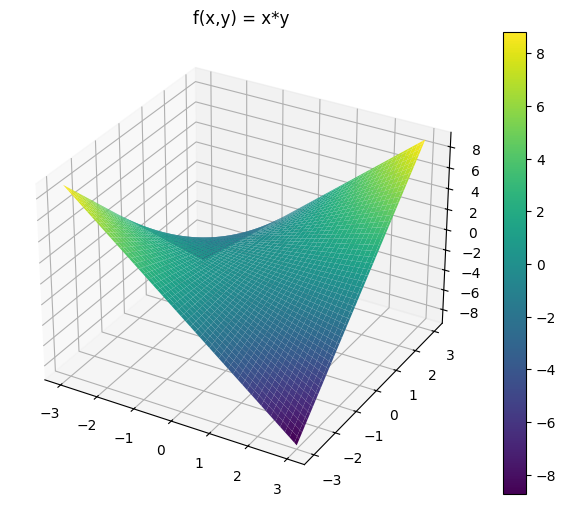

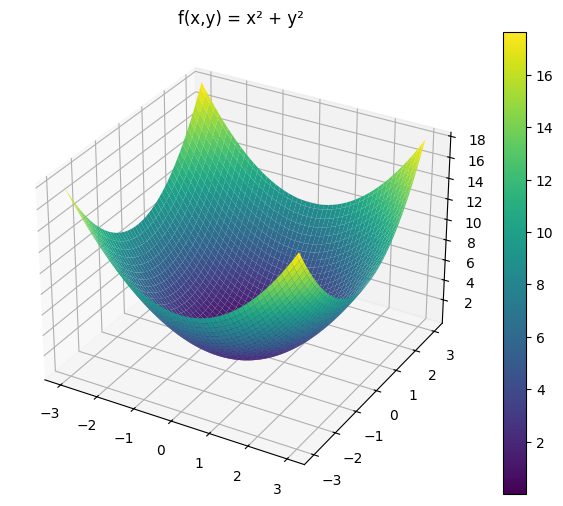

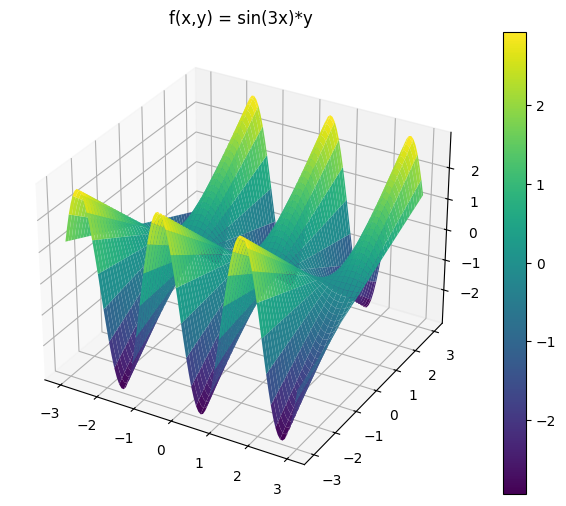

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

#fig
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')
Z1 = X * Y
surf1 = ax1.plot_surface(X, Y, Z1, cmap='viridis')
ax1.set_title('f(x,y) = x*y')
fig1.colorbar(surf1)
plt.show()

fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111, projection='3d')
Z2 = X**2 + Y**2
surf2 = ax2.plot_surface(X, Y, Z2, cmap='viridis')
ax2.set_title('f(x,y) = x² + y²')
fig2.colorbar(surf2)
plt.show()

fig3 = plt.figure(figsize=(8, 6))
ax3 = fig3.add_subplot(111, projection='3d')
Z3 = np.sin(3*X) * Y
surf3 = ax3.plot_surface(X, Y, Z3, cmap='viridis')
ax3.set_title('f(x,y) = sin(3x)*y')
fig3.colorbar(surf3)
plt.show()

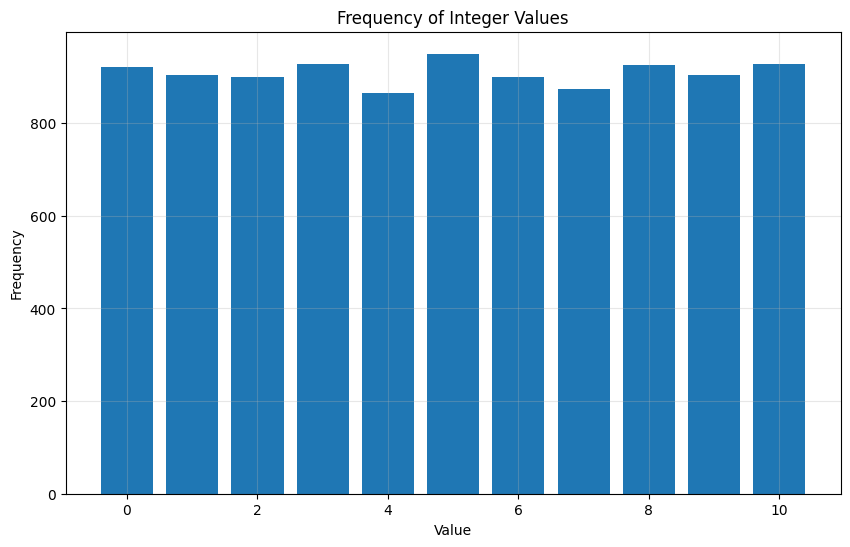

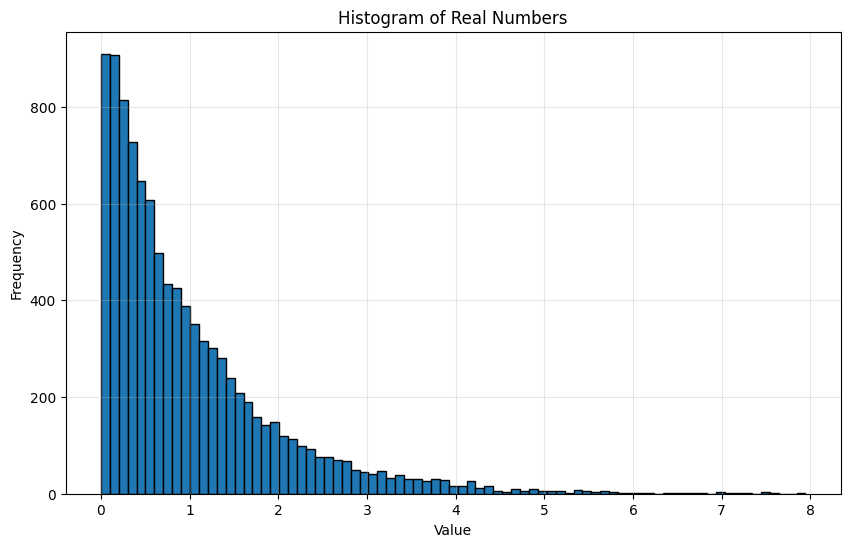

In [46]:
bar_data = pd.read_csv('values_for_bars.csv')
value_counts = bar_data.iloc[:,0].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(value_counts.index, value_counts.values)
plt.title('Frequency of Integer Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

hist_data = pd.read_csv('values_for_hist.csv')

plt.figure(figsize=(10,6))
plt.hist(hist_data.iloc[:,0], bins='auto', edgecolor='black')
plt.title('Histogram of Real Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# prediction part

In [10]:
from typing import Tuple

def generate_sample_data(n_samples: int = 100) -> Tuple[np.ndarray, np.ndarray]:
    """Generate sample data if not provided."""
    x = np.linspace(0, 10, n_samples)
    y = x * np.sin(x)
    return x, y

def add_noise(y: np.ndarray, noise_level: float = 0.5) -> np.ndarray:
    """Add Gaussian noise to the data."""
    return y + np.random.normal(0, noise_level, y.shape)


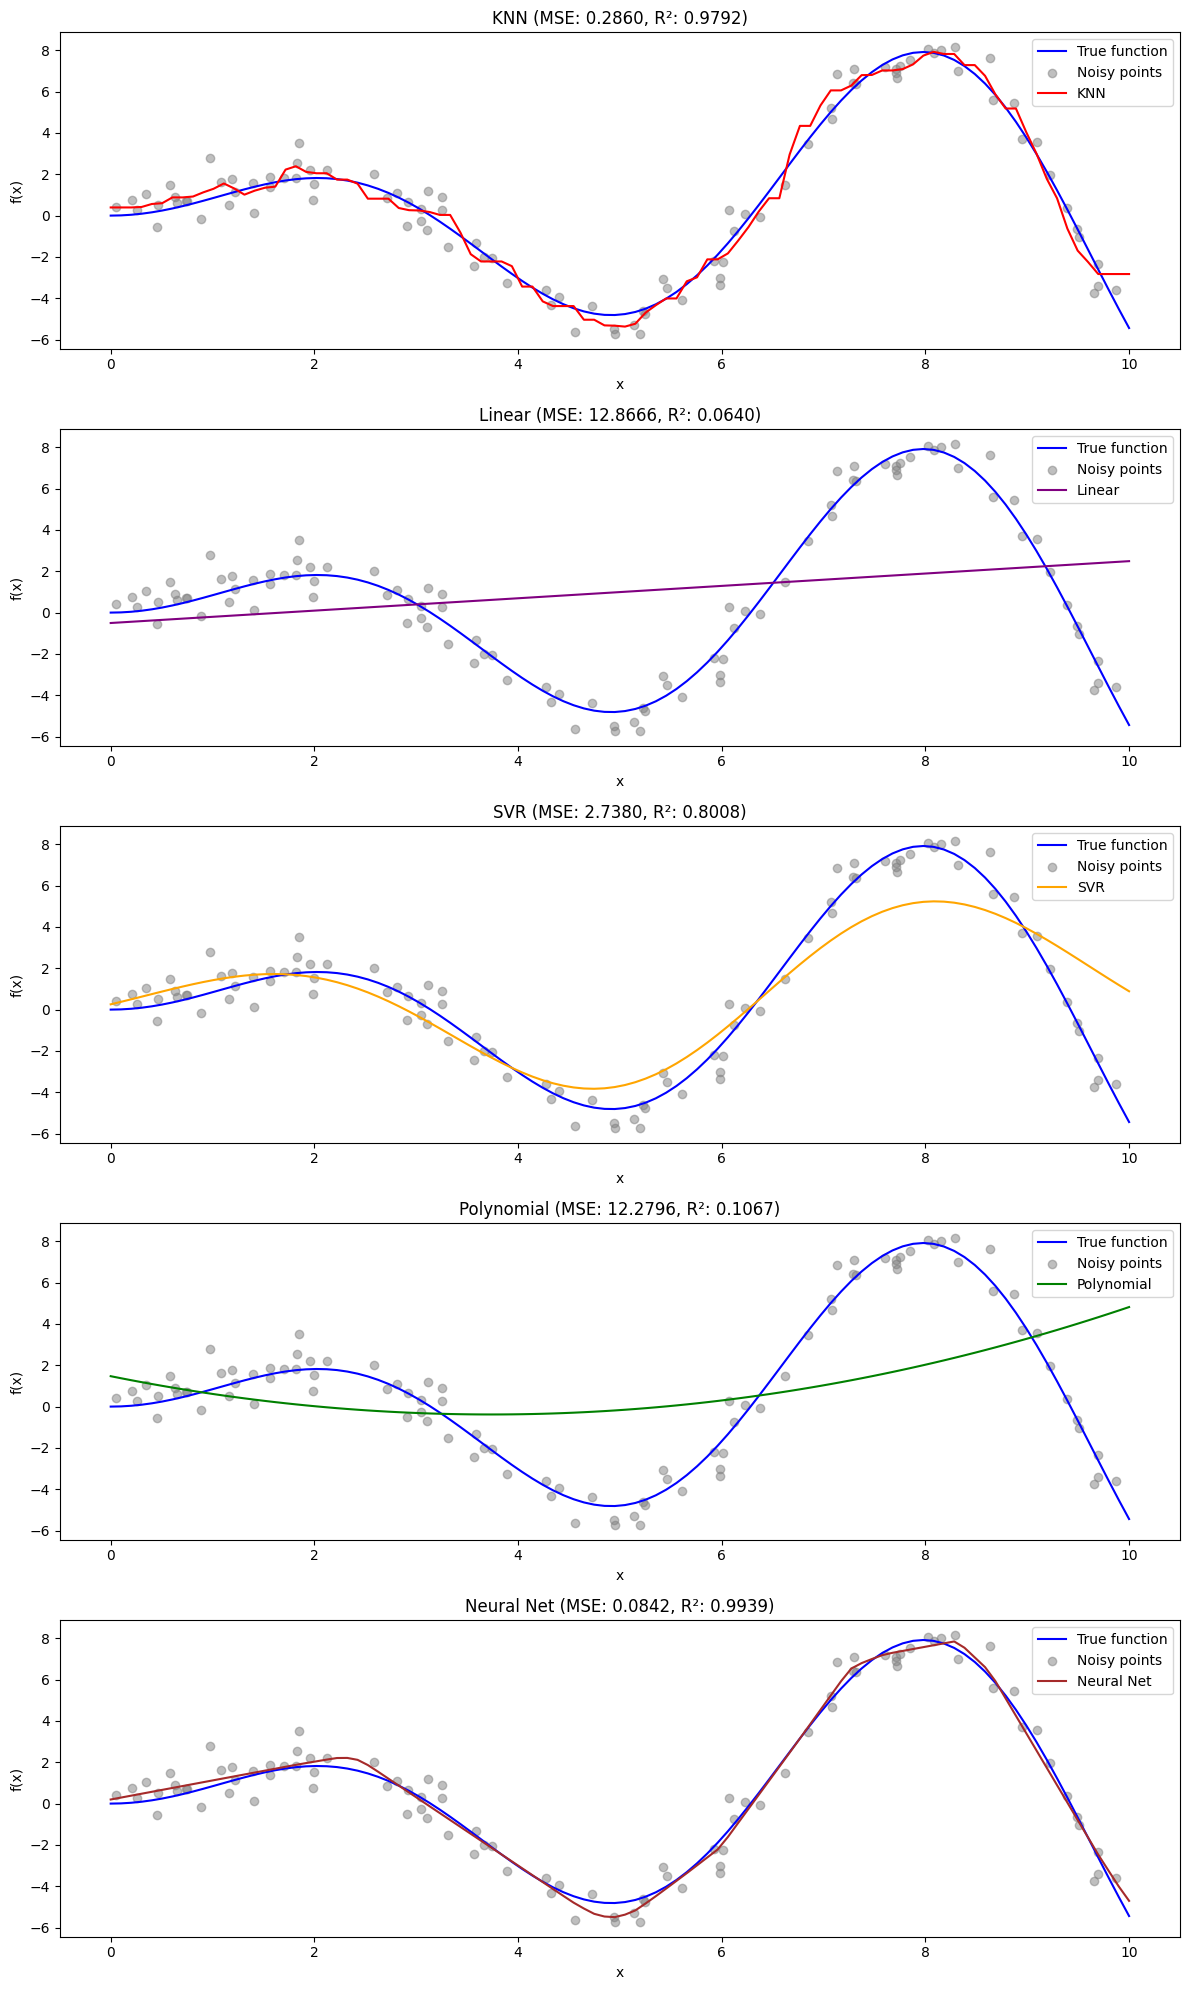


Model Comparison:
--------------------------------------------------

KNN:
MSE: 0.2860
R²: 0.9792

Linear:
MSE: 12.8666
R²: 0.0640

SVR:
MSE: 2.7380
R²: 0.8008

Polynomial:
MSE: 12.2796
R²: 0.1067

Neural Net:
MSE: 0.0842
R²: 0.9939


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


def create_models():
    models = {
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'Linear': LinearRegression(),
        'SVR': SVR(kernel='rbf', C=1.0),
        'Polynomial': Pipeline([
            ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
        ]),
        'Neural Net': MLPRegressor(
            hidden_layer_sizes=(100, 50),
            max_iter=1000,
            random_state=42
        )
    }
    return models

def train_and_evaluate_models(X: np.ndarray, y: np.ndarray, X_true: np.ndarray, y_true: np.ndarray) -> dict:
    X = X.reshape(-1, 1)
    X_true = X_true.reshape(-1, 1)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_true_scaled = scaler.transform(X_true)
    
    models = create_models()
    results = {}
    
    for name, model in models.items():
        if name in ['SVR', 'Neural Net']:
            model.fit(X_scaled, y)
            y_pred = model.predict(X_true_scaled)
        else:
            model.fit(X, y)
            y_pred = model.predict(X_true)
            
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'mse': mean_squared_error(y_true, y_pred),
            'r2': r2_score(y_true, y_pred)
        }
    
    return results

def plot_comparison(x: np.ndarray, y_true: np.ndarray, x_sample: np.ndarray, 
                   y_sample: np.ndarray, results: dict) -> None:
    fig, axes = plt.subplots(len(results), 1, figsize=(12, 4*len(results)))
    
    colors = {
        'KNN': 'red',
        'Linear': 'purple',
        'SVR': 'orange',
        'Polynomial': 'green',
        'Neural Net': 'brown'
    }
    
    for idx, (name, result) in enumerate(results.items()):
        ax = axes[idx]
        ax.plot(x, y_true, label="True function", color="blue")
        ax.scatter(x_sample, y_sample, color="gray", label="Noisy points", alpha=0.5)
        ax.plot(x, result['predictions'], label=f"{name}", color=colors[name])
        ax.set_title(f"{name} (MSE: {result['mse']:.4f}, R²: {result['r2']:.4f})")
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.legend()
    
    plt.tight_layout()
    plt.show()

np.random.seed(42)
n_samples = 100
noise_level = 0.8
x, y = generate_sample_data(n_samples)
x_sample = np.random.uniform(0, 10, n_samples)
y_sample = x_sample * np.sin(x_sample)
y_sample_noisy = add_noise(y_sample, noise_level)
results = train_and_evaluate_models(x_sample, y_sample_noisy, x, y)
plot_comparison(x, y, x_sample, y_sample_noisy, results)
print("\nModel Comparison:")
print("-" * 50)
for name, result in results.items():
    print(f"\n{name}:")
    print(f"MSE: {result['mse']:.4f}")
    print(f"R²: {result['r2']:.4f}")


Optimizing models...


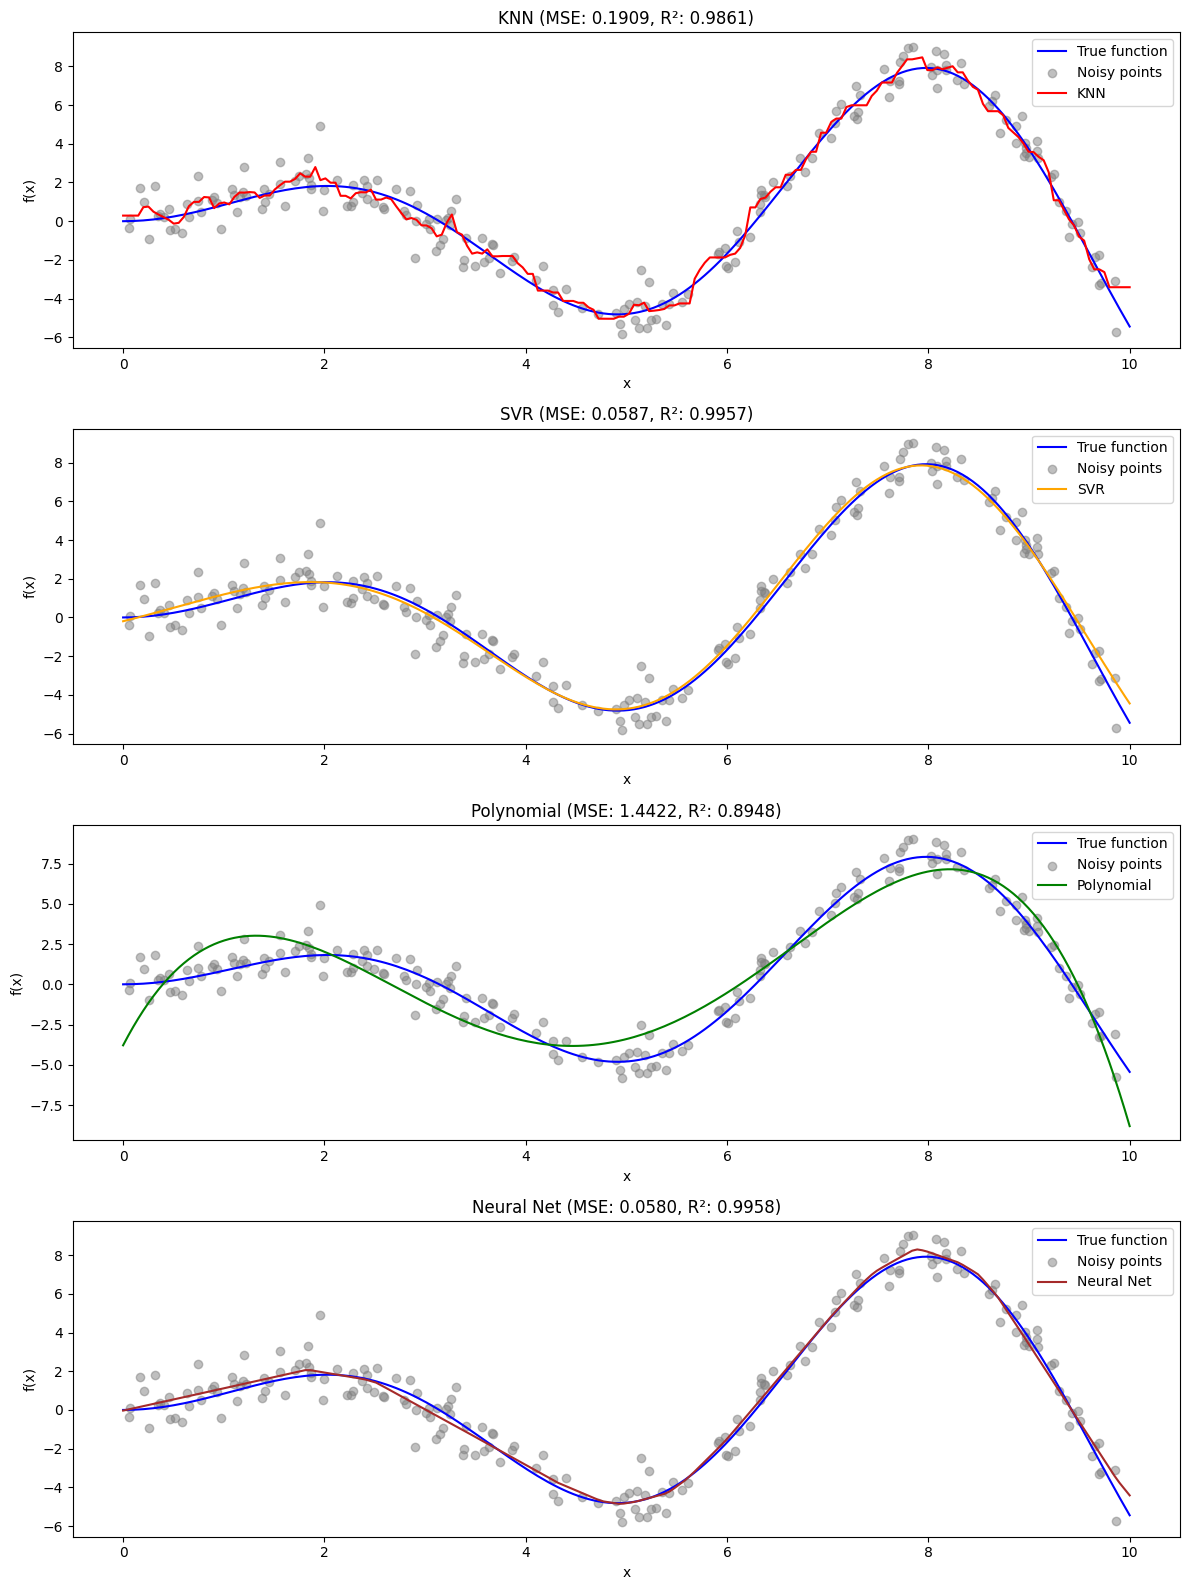


Optimal Parameters:
--------------------------------------------------

KNN:
Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Cross-validation MSE: 0.7497

SVR:
Best parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
Cross-validation MSE: 0.6413

Polynomial:
Best parameters: {'poly__degree': 4}
Cross-validation MSE: 1.8345

Neural Net:
Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50)}
Cross-validation MSE: 0.6542


In [17]:
def get_param_grids():
    return {
        'KNN': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance']
        },
        'SVR': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'poly'],
            'epsilon': [0.1, 0.2, 0.3]
        },
        'Polynomial': {
            'poly__degree': [2, 3, 4],
        },
        'Neural Net': {
            'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)],
            'activation': ['relu', 'tanh', 'logistic'],
            'alpha': [0.0001, 0.001, 0.01]
        }
    }

def train_and_evaluate_models(X: np.ndarray, y: np.ndarray, X_true: np.ndarray, y_true: np.ndarray, 
                            optimized_models: dict = None) -> dict:
    X = X.reshape(-1, 1)
    X_true = X_true.reshape(-1, 1)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_true_scaled = scaler.transform(X_true)
    
    if optimized_models is None:
        models = create_models()
    else:
        models = {name: info['model'] for name, info in optimized_models.items()}
    
    results = {}
    
    for name, model in models.items():
        try:
            if name in ['SVR', 'Neural Net']:
                model.fit(X_scaled, y)
                y_pred = model.predict(X_true_scaled)
            else:
                model.fit(X, y)
                y_pred = model.predict(X_true)
                
            results[name] = {
                'model': model,
                'predictions': y_pred,
                'mse': mean_squared_error(y_true, y_pred),
                'r2': r2_score(y_true, y_pred)
            }
        except Exception as e:
            print(f"Error training {name}: {str(e)}")
            continue
    
    return results

def optimize_models(X: np.ndarray, y: np.ndarray) -> dict:
    X = X.reshape(-1, 1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    models = {
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'Polynomial': Pipeline([
            ('poly', PolynomialFeatures()),
            ('linear', LinearRegression())
        ]),
        'Neural Net': MLPRegressor(max_iter=1000, random_state=42)
    }
    
    param_grids = get_param_grids()
    optimized_models = {}
    
    for name, model in models.items():
        grid = GridSearchCV(
            model, 
            param_grids[name],
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        
        if name in ['SVR', 'Neural Net']:
            grid.fit(X_scaled, y)
        else:
            grid.fit(X, y)
            
        optimized_models[name] = {
            'model': grid.best_estimator_,
            'params': grid.best_params_,
            'score': -grid.best_score_
        }
    
    return optimized_models

np.random.seed(42)
n_samples = 200  # Increased sample size
noise_level = 0.8

x, y = generate_sample_data(n_samples)
x_sample = np.random.uniform(0, 10, n_samples)
y_sample = x_sample * np.sin(x_sample)
y_sample_noisy = add_noise(y_sample, noise_level)

print("Optimizing models...")
optimized_models = optimize_models(x_sample, y_sample_noisy)

results = train_and_evaluate_models(x_sample, y_sample_noisy, x, y, 
                                  optimized_models)

plot_comparison(x, y, x_sample, y_sample_noisy, results)

print("\nOptimal Parameters:")
print("-" * 50)
for name, info in optimized_models.items():
    print(f"\n{name}:")
    print(f"Best parameters: {info['params']}")
    print(f"Cross-validation MSE: {info['score']:.4f}")


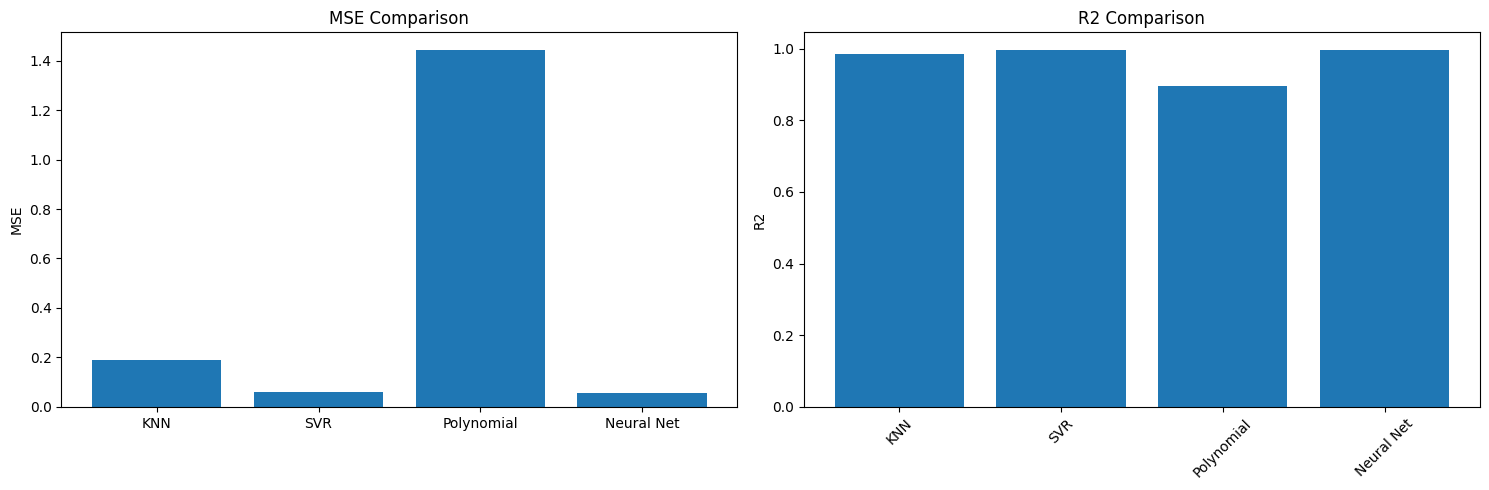

In [19]:
def compare_performance(results: dict) -> None:
    metrics = ['mse', 'r2']
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    for idx, metric in enumerate(metrics):
        values = [result[metric] for result in results.values()]
        names = list(results.keys())
        
        axes[idx].bar(names, values)
        axes[idx].set_title(f'{metric.upper()} Comparison')
        axes[idx].set_ylabel(metric.upper())
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

compare_performance(results)

In [20]:
def analyze_model_performance(results: dict) -> dict:
    """Analyze and rank model performance"""
    # Create performance summary
    summary = {
        'mse_ranking': sorted([(name, res['mse']) for name, res in results.items()], 
                             key=lambda x: x[1]),
        'r2_ranking': sorted([(name, res['r2']) for name, res in results.items()], 
                             key=lambda x: x[1], reverse=True)
    }
    
    print("\nModel Rankings:")
    print("-" * 50)
    print("\nBest Models by MSE (lower is better):")
    for name, mse in summary['mse_ranking']:
        print(f"{name}: {mse:.4f}")
    
    print("\nBest Models by R² (higher is better):")
    for name, r2 in summary['r2_ranking']:
        print(f"{name}: {r2:.4f}")
        
    # Identify best overall model
    best_model = summary['r2_ranking'][0][0]
    print(f"\nBest Overall Model: {best_model}")
    
    return summary

# Call after compare_performance
summary = analyze_model_performance(results)


Model Rankings:
--------------------------------------------------

Best Models by MSE (lower is better):
Neural Net: 0.0580
SVR: 0.0587
KNN: 0.1909
Polynomial: 1.4422

Best Models by R² (higher is better):
Neural Net: 0.9958
SVR: 0.9957
KNN: 0.9861
Polynomial: 0.8948

Best Overall Model: Neural Net
